## 案例一：应用ID3算法构建决策树以分类Iris数据集

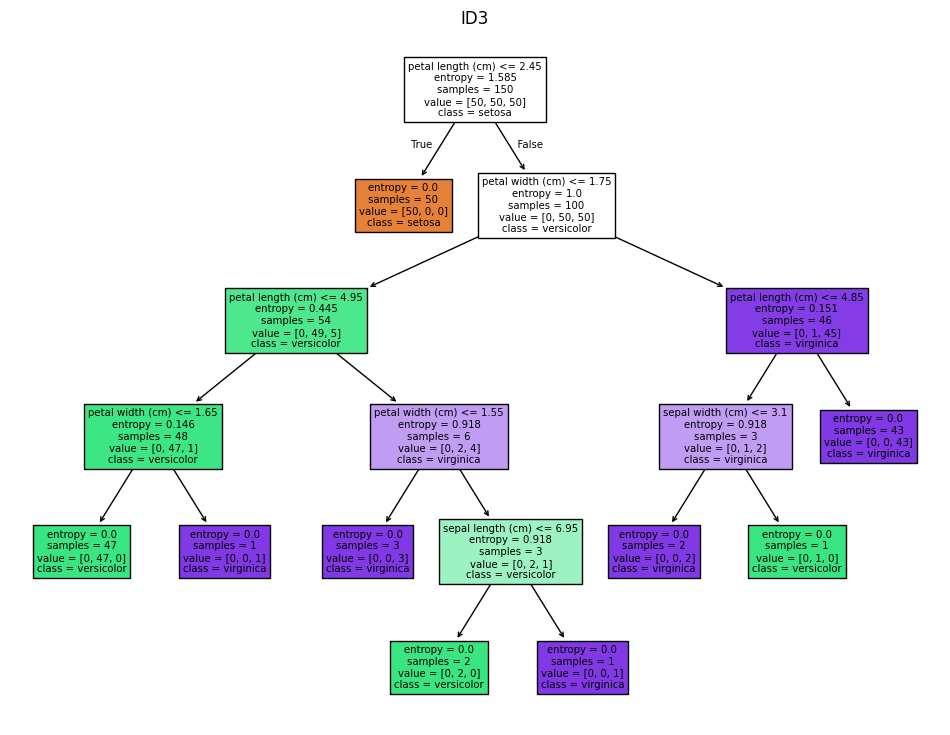

In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree  #可视化决策树
import matplotlib.pyplot as plt

# 加载数据
iris = load_iris()
X, y = iris.data, iris.target

#criterion: Literal['gini', 'entropy', 'log_loss']
clf=DecisionTreeClassifier(criterion='entropy')
clf.fit(X,y)

plt.figure(figsize=(12,9))
plot_tree(clf,filled=True,feature_names=iris.feature_names,class_names=iris.target_names)
plt.title('ID3')#It-erative Dichotomiser(迭代二分器)的简称
plt.show()

在上述的决策树中，根节点基于花瓣长度（小于等于2.45厘米）将数据分为两组，其中一组完全由Setosa类构成，表明此属性非常有效地区分了Setosa与其他两种类型。根节点的信息熵为1.585，涵盖150个样本，显示了初始数据集的多样性。

对于花瓣长度大于2.45厘米的样本，决策树进一步使用花瓣宽度作为分类特征。当花瓣宽度小于等于1.75厘米时，树继续探索花瓣长度，以进一步分离Versicolor和Virginica。这一过程重复，直至达到较低的熵值，表明节点的类别纯度有显著提高。例如，花瓣宽度小于1.65厘米和花瓣长度小于4.95厘米的分支，成功区分了绝大多数的Versicolor。

另一方面，对于花瓣宽度大于1.75厘米的样本，决策树通过检查花瓣长度是否小于4.85厘米来进行分割，这有助于识别绝大部分的Virginica，只留下少数Versicolor。这种连续的属性检查和分类标准调整有效降低了各个节点的熵值，增强了决策树的预测准确性。

整体而言，这棵决策树通过逐步分析和应用信息增益原则，精确地对iris数据集中的花种类别进行了区分，几乎所有的叶节点都达到了完全纯净的状态，显示了ID3算法在处理具有明显区别特征的数据集中的强大能力。

#### 在 scikit-learn 这样的机器学习库中，C4.5算法并没有被直接实现。但它的功能和工作原理可以通过**DecisionTreeClassifier** 中的 criterion='entropy' 来近似实现，因为 C4.5 主要是基于信息增益率的决策树算法，而 scikit-learn 提供的 entropy 选项使用的是信息熵，这是 C4.5 的一部分核心计算方式。

## 案例二：CART算法

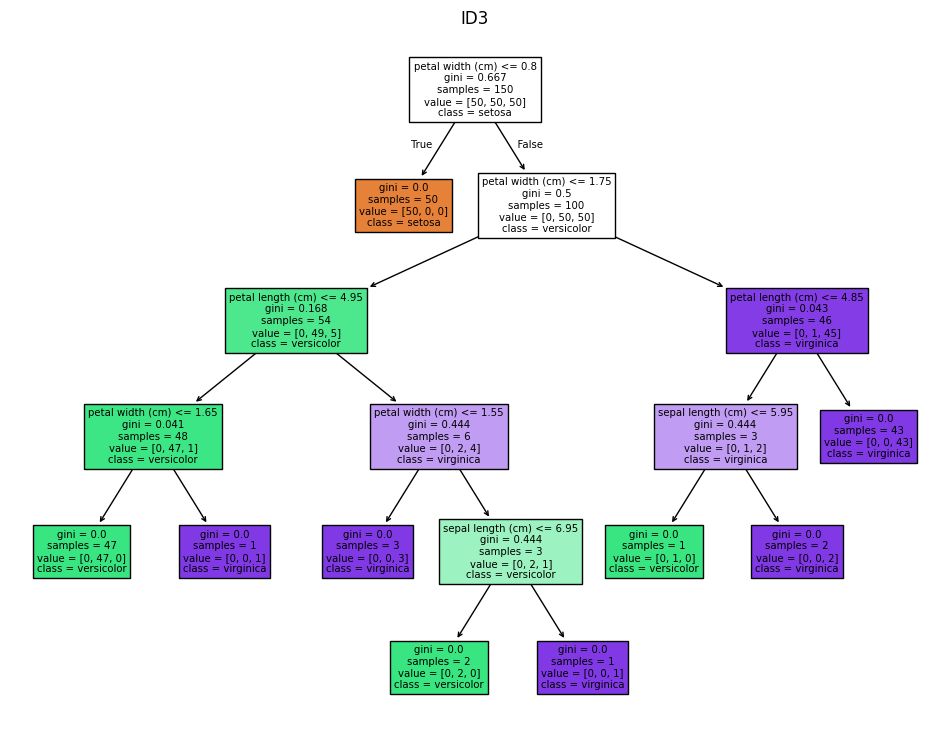

In [7]:
#“Classification And Regression Tree”，中文翻译为“分类回归树算法”‌‌
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 加载iris数据集
iris = load_iris()
X, y = iris.data, iris.target

#criterion: Literal['gini', 'entropy', 'log_loss']
clf=DecisionTreeClassifier(criterion='gini')
clf.fit(X,y)

plt.figure(figsize=(12,9))
plot_tree(clf,filled=True,feature_names=iris.feature_names,class_names=iris.target_names)
plt.title('CART')#It-erative Dichotomiser(迭代二分器)的简称
plt.show()

## 案例三：使用决策树对鸢尾花、digits数据集进行分类

In [102]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
iris = load_iris()
x = iris.data
y = iris.target
x.shape;y.shape
# x_train = iris.data[:-1,2:]
# y_train = iris.target[:-1]
# x_test = iris.data[-1,2:]
# y_test = iris.target[-1]

scale=MinMaxScaler()
x = scale.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)
clf = DecisionTreeClassifier().fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred
print("决策树分类器的准确率为：{:.2f}%".format(accuracy_score(y_test,y_pred)*100))

决策树分类器的准确率为：100.00%


## 案例四：决策树判断西瓜的好坏

In [471]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

data = pd.read_csv('datasets/melon_data.csv', encoding='gbk')
print('西瓜的数据形态：', data.shape)
print('读取前10条西瓜的数据：')
data.head(10)

西瓜的数据形态： (17, 10)
读取前10条西瓜的数据：


,编号,色泽,根蒂,敲声,纹理,脐部,触感,密度,含糖率,好瓜与否
0,1,青绿,蜷缩,浊响,清晰,凹陷,硬滑,0.697,0.460,是
1,2,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,0.774,0.376,是
2,3,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,0.634,0.264,是
3,4,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,0.608,0.318,是
4,5,浅白,蜷缩,浊响,清晰,凹陷,硬滑,0.556,0.215,是
5,6,青绿,稍蜷,浊响,清晰,稍凹,软粘,0.403,0.237,是
6,7,乌黑,稍蜷,浊响,稍糊,稍凹,软粘,0.481,0.149,是
7,8,乌黑,稍蜷,浊响,清晰,稍凹,硬滑,0.437,0.211,是
8,9,乌黑,稍蜷,沉闷,稍糊,稍凹,硬滑,0.666,0.091,否
9,10,青绿,硬挺,清脆,清晰,平坦,软粘,0.243,0.267,否


In [472]:
# 将target目标值转变为数字

# 首先将所有不是'是'的分类标签转换为0
# data.loc[data['好瓜与否']!='是','好瓜与否']=0

# 接着将所有是'是'的分类标签转换为1
data['好瓜与否']=np.where(data['好瓜与否']=='是',1,0)
# data.loc[data['好瓜与否']=='是','好瓜与否']=1

# 确保'好瓜与否'列的数据类型为整型，方便后续的计算和模型训练
data['好瓜与否']=data['好瓜与否'].astype(int)

# 打印修改目标值之后的数据集的前10行，以验证更改是否正确执行
data.head(10)

,编号,色泽,根蒂,敲声,纹理,脐部,触感,密度,含糖率,好瓜与否
0,1,青绿,蜷缩,浊响,清晰,凹陷,硬滑,0.697,0.460,1
1,2,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,0.774,0.376,1
2,3,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,0.634,0.264,1
3,4,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,0.608,0.318,1
4,5,浅白,蜷缩,浊响,清晰,凹陷,硬滑,0.556,0.215,1
5,6,青绿,稍蜷,浊响,清晰,稍凹,软粘,0.403,0.237,1
6,7,乌黑,稍蜷,浊响,稍糊,稍凹,软粘,0.481,0.149,1
7,8,乌黑,稍蜷,浊响,清晰,稍凹,硬滑,0.437,0.211,1
8,9,乌黑,稍蜷,沉闷,稍糊,稍凹,硬滑,0.666,0.091,0
9,10,青绿,硬挺,清脆,清晰,平坦,软粘,0.243,0.267,0


In [473]:
#将字符串转独热编码
one_hot_encoded = pd.get_dummies(data.iloc[:,1:-1])
one_hot_encoded.head(10)

,密度,含糖率,色泽_乌黑,色泽_浅白,色泽_青绿,根蒂_硬挺,根蒂_稍蜷,根蒂_蜷缩,敲声_沉闷,敲声_浊响,敲声_清脆,纹理_模糊,纹理_清晰,纹理_稍糊,脐部_凹陷,脐部_平坦,脐部_稍凹,触感_硬滑,触感_软粘
0,0.697,0.460,False,False,True,False,False,True,False,True,False,False,True,False,True,False,False,True,False
1,0.774,0.376,True,False,False,False,False,True,True,False,False,False,True,False,True,False,False,True,False
2,0.634,0.264,True,False,False,False,False,True,False,True,False,False,True,False,True,False,False,True,False
3,0.608,0.318,False,False,True,False,False,True,True,False,False,False,True,False,True,False,False,True,False
4,0.556,0.215,False,True,False,False,False,True,False,True,False,False,True,False,True,False,False,True,False
5,0.403,0.237,False,False,True,False,True,False,False,True,False,False,True,False,False,False,True,False,True
6,0.481,0.149,True,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,True
7,0.437,0.211,True,False,False,False,True,False,False,True,False,False,True,False,False,False,True,True,False
8,0.666,0.091,True,False,False,False,True,False,True,False,False,False,False,True,False,False,True,True,False
9,0.243,0.267,False,False,True,True,False,False,False,False,True,False,True,False,False,True,False,False,True


#### 用决策树建模并做出预测

In [496]:
x=one_hot_encoded.values
y=data.iloc[:,-1].values

scale=MinMaxScaler()
x = scale.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)
clf = DecisionTreeClassifier(max_depth=2).fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred
print("决策树分类器的准确率为：{:.2f}%".format(accuracy_score(y_test,y_pred)*100))

决策树分类器的准确率为：50.00%


#### 决策树的分类过程展示

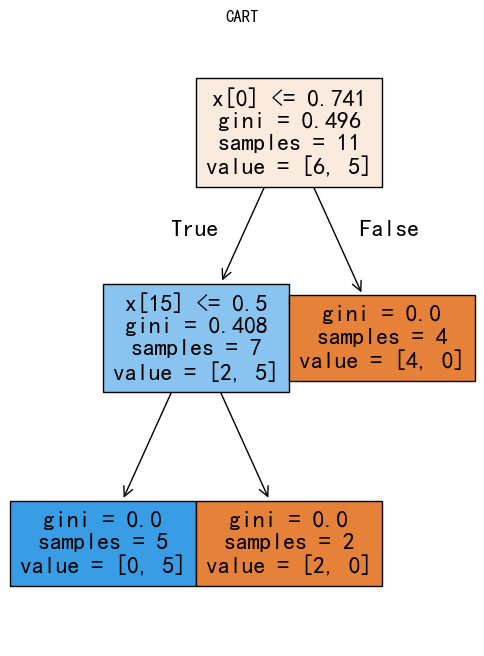

In [176]:
plt.figure(figsize=(6,8))
plot_tree(clf,filled=True)
plt.title('CART')#It-erative Dichotomiser(迭代二分器)的简称
plt.show()

## 案例五：决策树实现酒分类

#### 数据准备

In [451]:
import numpy as np
import pandas as pd
# 导入数据集获取工具
from sklearn.datasets import load_wine
#用于拆分训练数据和样本数据
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict  #交叉验证

# 读取酒的数据集
wine = load_wine()
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print('训练集数据的维度为：',X_train.shape)
print('训练集标签的维度为：',y_train.shape)
print('测试集数据的维度为：',X_test.shape)
print('测试集标签的维度为：',y_test.shape)

训练集数据的维度为： (133, 13)
训练集标签的维度为： (133,)
测试集数据的维度为： (45, 13)
测试集标签的维度为： (45,)


#### 构建与评价分类模型

In [452]:
#决策树
clf = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# print("决策树分类器的准确率为：{:.2f}%".format(accuracy_score(y_test,y_pred)*100))

#随机森林算法的分类器
rfc=RandomForestClassifier(max_depth=2).fit(X_train,y_train)
# y_pred2=rfc.predict(X_test)
# print("随机树分类器的准确率为：{:.2f}%".format(accuracy_score(y_test,y_pred2)*100))

#得分评定
print("决策树分类器的得分为：{:.2f}%".format(clf.score(X_test,y_test)*100))
print("随机森林分类器的得分为：{:.2f}%".format(rfc.score(X_test,y_test)*100))

决策树分类器的得分为：93.33%
随机森林分类器的得分为：97.78%


#### 使用交叉验证评估模型

决策树分类器的准确率为：
89.88%，90.99%，90.42%，89.32%，91.55%，89.32%，89.32%，89.31%，85.43%，86.00%，
随机森林分类器的准确率为：
94.40%，92.72%，92.14%，93.82%，93.83%，93.82%，92.15%，94.39%，93.83%，94.95%，

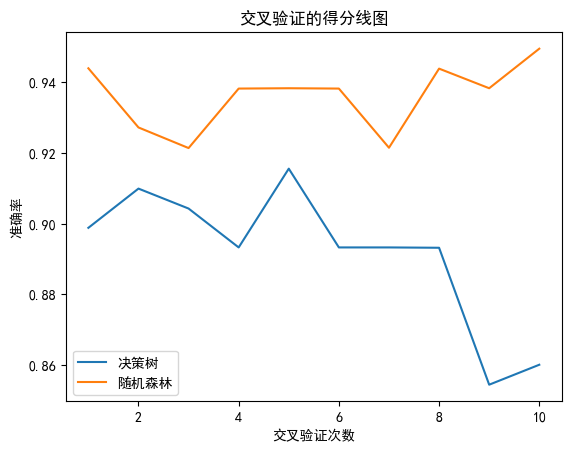

In [470]:
# 启用Jupyter Notebook中的内嵌绘图
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# 配置matplotlib以正确显示中文和负号
plt.rcParams['font.sans-serif'] = ['SimHei']   # 设置字体为SimHei，以支持中文显示
plt.rcParams['axes.unicode_minus'] = False     # 设置以正常显示负号（-）

# 为了观察更稳定的结果，下面进行十组交叉验证    
rfc_l = []  # 用于存储随机森林的交叉验证分数
clf_l = []  # 用于存储决策树的交叉验证分数

for i in range(10):
    clf = DecisionTreeClassifier(max_depth=3)
    rfc=RandomForestClassifier(max_depth=2)

    y_pred=cross_val_score(clf,X,y,cv=3).mean()
    clf_l.append(y_pred)
    y_pred2=cross_val_score(rfc,X,y,cv=3).mean()
    rfc_l.append(y_pred2)
# print(rfc_l)
# print(clf_l)
print("决策树分类器的准确率为：")
for i in clf_l:
    print("{:.2f}%".format(i*100),end='，')
print("\n随机森林分类器的准确率为：")
for i in rfc_l:
    print("{:.2f}%".format(i*100),end='，')

# 画出交叉验证的得分折线图
plt.plot(range(1,11), clf_l, label='决策树')
plt.plot(range(1,11), rfc_l, label='随机森林')
plt.legend()
plt.title('交叉验证的得分折线图')
plt.xlabel('交叉验证次数')
plt.ylabel('准确率')
plt.show()